In [ ]:
!pip install klib
!pip install -U scikit-learn
!python -m pip install -U pip
!python -m pip install -U matplotlib
!pip install langchain
!pip install sentence_transformers
!pip install tqdm
!pip install feature_engine
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install mplcursors
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=a02623295f86decefc7b71a3187f691e42f295a66d29d4abd8d6802e61b94099
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd #for data manipulation
import numpy as np #for matrix
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for plots
import sklearn #for machine learning
from google.colab import files #file imprt
import klib #data cleaning

#our models and ML tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for HTML view
from IPython.display import display, HTML

#load csv into variable
uploaded = files.upload()

Saving nasa.csv to nasa.csv


In [ ]:
#load csv into DF
df = pd.read_csv('/content/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
#display missing valaues
klib.missingval_plot(df)

# create clean df copy
df_clean = klib.data_cleaning(df)
df_clean.head()

No missing values found in the dataset.
Shape of cleaned data: (4687, 38) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 2
     of which 2 single valued.     Columns: ['orbiting_body', 'equinox']
Dropped missing values: 0
Reduced memory by at least: 0.59 MB (-42.14%)



,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min,est_dia_in_km_max,est_dia_in_m_min,est_dia_in_m_max,est_dia_in_miles_min,est_dia_in_miles_max,est_dia_in_feet_min,...,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,3703080,3703080,21.600000,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373901,609.599792,0.808259,57.257469,2.005764,2.458162e+06,264.837524,0.590551,True
1,3723955,3723955,21.299999,0.146068,0.326618,146.067963,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717239,425.869293,0.718200,313.091980,1.497352,2.457795e+06,173.741119,0.845330,False
2,2446862,2446862,20.299999,0.231502,0.517654,231.502121,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475983,643.580200,0.950791,248.415039,1.966857,2.458120e+06,292.893646,0.559371,True
3,3092506,3092506,27.400000,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173267,514.082153,0.983902,18.707701,1.527904,2.457902e+06,68.741005,0.700277,False
4,3514799,3514799,21.600000,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793381,84.629311,495.597809,0.967687,158.263596,1.483543,2.457814e+06,135.142136,0.726395,True


In [ ]:
df_asteroid_info = df_clean[['neo_reference_id', 'name']]


#create new df, df_asteroid, from df_clean without identification information
df_asteroid = df_clean.drop(['neo_reference_id', 'name'], axis=1)
print(df_asteroid.shape)
print(df_asteroid_info.head())

#remove cols we don't need for our model
cols_to_drop = ['est_dia_in_km_min', #same data, different unit
                'est_dia_in_km_max', #same data, different unit
                'est_dia_in_miles_min', #same data, different unit
                'est_dia_in_miles_max', #same data, different unit
                'est_dia_in_feet_min', #same data, different unit
                'est_dia_in_feet_max', #same data, different unit
                'miss_dist_miles', #same data, different unit
                'close_approach_date', #dont need this for our model
                'orbit_determination_date'] #dont need this for our model

df_asteroid = df_asteroid.drop(cols_to_drop, axis=1)
print(df_asteroid.shape)

(4687, 36)
   neo_reference_id     name
0           3703080  3703080
1           3723955  3723955
2           2446862  2446862
3           3092506  3092506
4           3514799  3514799
(4687, 27)


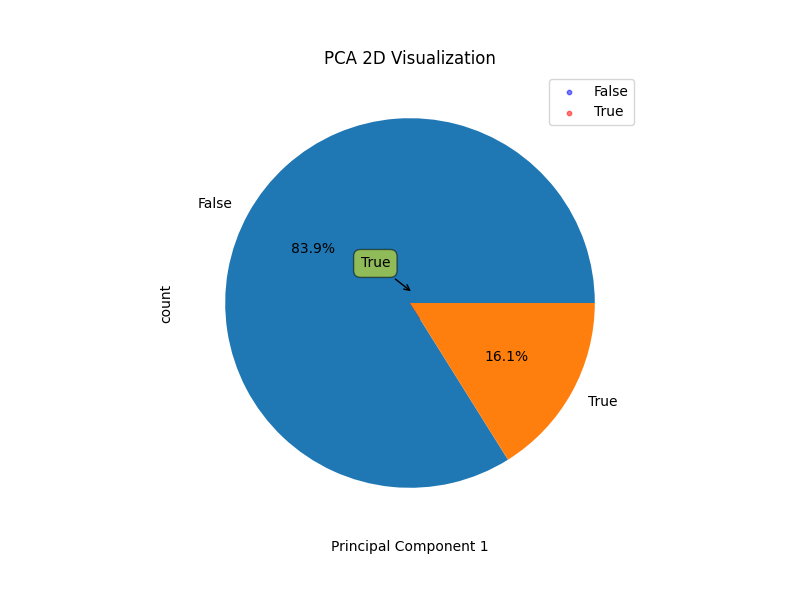

In [ ]:
#make pie grpah showing 'hazardous' value distribution
df_asteroid['hazardous'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler #will use sklearns standard scaler to normalize our data

# Separate features from the target variable
X = df_asteroid.drop(columns=['hazardous'])
y = df_asteroid['hazardous']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized features
df_asteroid_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Add the target variable back to the DataFrame
df_asteroid_normalized['hazardous'] = y

X_train, X_test, y_train, y_test = train_test_split(df_asteroid_normalized.drop('hazardous', axis=1), df_asteroid_normalized['hazardous'], test_size=0.2, random_state=42)


In [ ]:
#random 80 20 test train split
X_train, X_test, y_train, y_test = train_test_split(df_asteroid.drop('hazardous', axis=1), df_asteroid['hazardous'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3749, 26)
(938, 26)
(3749,)
(938,)


In [ ]:
train_x_textual = []
for row in X_train.values:
  row_textual = []
  for column_index, value in enumerate(row):
    column_name = X_train.columns[column_index]
    row_textual.append(f"{column_name}: {value}")
  train_x_textual.append(' '.join(row_textual))

test_x_textual = []
for row in X_test.values:
  row_textual = []
  for column_index, value in enumerate(row):
    column_name = X_test.columns[column_index]
    row_textual.append(f"{column_name}: {value}")
  test_x_textual.append(' '.join(row_textual))

train_x_textual[0]

'absolute_magnitude: 24.200000762939453 est_dia_in_m_min: 38.4197883605957 est_dia_in_m_max: 85.9092601232 epoch_date_close_approach: 1064214000000.0 relative_velocity_km_per_sec: 19.021011352539062 relative_velocity_km_per_hr: 68475.6389823642 miles_per_hour: 42548.0991221251 miss_dist_astronomical: 0.3448072075843811 miss_dist_lunar: 134.1300048828125 miss_dist_kilometers: 51582424.0 orbit_id: 9.0 orbit_uncertainity: 8.0 minimum_orbit_intersection: 0.04636729881167412 jupiter_tisserand_invariant: 6.230999946594238 epoch_osculation: 2453268.5 eccentricity: 0.18642398715019226 semi_major_axis: 0.9544790983200073 inclination: 22.089733123779297 asc_node_longitude: 356.8192138671875 orbital_period: 340.6026916503906 perihelion_distance: 0.7765413522720337 perihelion_arg: 226.94091796875 aphelion_dist: 1.1324169635772705 perihelion_time: 2453155.863916846 mean_anomaly: 119.05070495605469 mean_motion: 1.0569499731063843'

In [ ]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

embedding_model = HuggingFaceBgeEmbeddings(
  model_name="BAAI/bge-large-en-v1.5",
  model_kwargs={'device': 'cuda'},
  encode_kwargs={'normalize_embeddings': True}
  )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm


# Generate embeddings for training data using GPU acceleration
train_embeddings = []
for feature in tqdm(train_x_textual, desc="Generating train embeddings"):
    embeddings = embedding_model.embed_documents([feature])
    train_embeddings.append(embeddings[0])

# Generate embeddings for test data using GPU acceleration
test_embeddings = []
for feature in tqdm(test_x_textual, desc="Generating test embeddings"):
    embeddings = embedding_model.embed_documents([feature])
    test_embeddings.append(embeddings[0])

Generating test embeddings: 100%|██████████| 938/938 [01:42<00:00,  9.15it/s]


In [ ]:
!pip install ipympl
!pip install utils
!pip install mplcursors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=a7f2092448d9ff7fa645c1d022b4d7648c4c3dbba1403104891f7c11948b09fd
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=8b48c3e3cac56c35e133bff12bb5ac76ace1332a10a4a172c89a66ece57b30d3
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd41

In [ ]:
np_train_embeddings = np.array(train_embeddings)
np_test_embeddings = np.array(test_embeddings)

print("Shape: " + str(np_train_embeddings.shape))

print("Unique labels in y_train:", np.unique(y_train))


Shape: (3749, 1024)
Unique labels in y_train: [False  True]


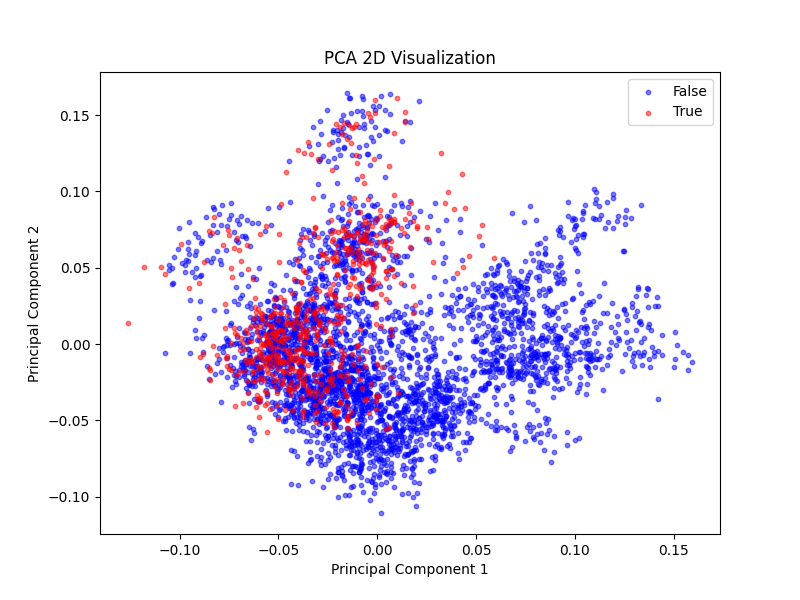

/usr/local/lib/python3.10/dist-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


KeyError: 314

StopIteration: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib ipympl

# Perform PCA for 2D visualization
PCA_model = PCA(n_components=2)
PCA_model.fit(train_embeddings)
new_values = PCA_model.transform(train_embeddings)

# Define colors for categories
colors = {False: 'blue', True: 'red'}  # Adjust colors as needed

# Adjust dot size and alpha for better visibility
dot_size = 10
alpha_value = 0.5

# Plot the scatter plot with custom colors
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    indices = np.where(y_train == label)
    plt.scatter(new_values[indices, 0], new_values[indices, 1], c=color, label=str(label), s=dot_size, alpha=alpha_value)  # Convert label to string

# Plot the 2D visualization
plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(y_train[sel.target.index]))
plt.show()



In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
import faiss
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Convert embeddings to float32 for FAISS
train_embeddings = np.array(train_embeddings).astype('float32')
test_embeddings = np.array(test_embeddings).astype('float32')

# Create a FAISS index using L2 distance
index = faiss.IndexFlatL2(train_embeddings.shape[1])

# Add train embeddings to the index
index.add(train_embeddings)

# Search function for a single validation embedding
def search(embedding):
    dist, ind = index.search(embedding.reshape(1, -1), k)
    return dist[0][0], ind[0][0]

# Number of nearest neighbors to find
k = 1

# Use multiprocessing to parallelize the search process
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap(search, test_embeddings), total=len(test_embeddings)))

# Unpack results into distances and indices
distances, indices = zip(*results)

# Convert distances and indices to numpy arrays
distances = np.array(distances)
indices = np.array(indices)

# Get the predictions based on the most similar indices
predictions_val = y_train.iloc[indices.flatten()].values

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 938/938 [00:04<00:00, 200.00it/s]


In [ ]:
#print indicies shape
print(indices.shape, type(indices))
print(y_train.shape, type(y_train))

(938,) <class 'numpy.ndarray'>
(3749,) <class 'pandas.core.series.Series'>


In [ ]:
#load indicies to predictions
predictions_val = train_y.iloc[indices.flatten()].values

In [ ]:
#verify the size of predictions_val matches test_y
print(predictions_val.shape)
print(y_test.shape)

In [ ]:
print("Sample Predictions:")
for i in range(50):  # printing first 50 predictions
   print(f"Features: {test_x_textual[i]}")
   print(f"Predicted Attack Type: {predictions_val[i]}")
   print(f"Actual Attack Type: {y_test.iloc[i]}")
   print("------")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_val)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, predictions_val)
print("\nClassification Report:")
print(report)

Accuracy: 0.8284

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       791
         1.0       0.44      0.38      0.41       147

    accuracy                           0.83       938
   macro avg       0.67      0.65      0.65       938
weighted avg       0.82      0.83      0.82       938

